Useful links: 
Parse tutorial: https://support.parsebiosciences.com/hc/en-us/articles/360052794312-Scanpy-Tutorial-65k-PBMCs
AnnData tutorial: https://scverse-tutorials.readthedocs.io/en/latest/notebooks/anndata_getting_started.html
scanpy tutorial: https://scanpy.readthedocs.io/en/stable/tutorials/basics/clustering.html

In [ ]:
# ! pip3 install scanpy
# ! pip3 install anndata
# ! pip3 install pooch

In [ ]:
# ! pip3 install scanpy
# ! pip3 install anndata
# ! pip3 install pooch

In [1]:
# Core scverse libraries
import scanpy as sc
import anndata as ad

# Data retrieval 
import pooch

# From Parse 
import numpy as np
import pandas as pd
# import scanpy as sc
import scipy
import os
import scipy.io as sio

In [2]:
sc.settings.set_figure_params(dpi=50, facecolor="white")

In [3]:
data_path = "/Users/ianschrack/Desktop/parse_analysis_10882-IS/all-sample/DGE_filtered/"

In [4]:
adata = sc.read_mtx(data_path + 'count_matrix.mtx')

# Read in gene & cell data
gene_data = pd.read_csv(data_path + "all_genes.csv")
cell_meta = pd.read_csv(data_path + "cell_metadata.csv")

# Find genes with nan values and filter
gene_data = gene_data[gene_data.gene_name.notnull()]
notNA = gene_data.index
notNA = notNA.to_list()

# Remove genes with nan values and assign gene names
adata = adata[:,notNA]
adata.var = gene_data
adata.var.set_index('gene_name', inplace = True)
adata.var_names_make_unique()

# Add cell meta data to anndata object
adata.obs = cell_meta
adata.obs.set_index('bc_wells', inplace=True)
adata.obs.index.name = None
adata.obs_names_make_unique()

sc.pp.filter_cells(adata, min_genes=300)
sc.pp.filter_genes(adata, min_cells=5)

# Returns the dimensions of the expression matrix (cells, genes)
adata.shape


(49244, 28815)

In [5]:

# Quality control

# Calculate and add mitochondrial DNA
adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)



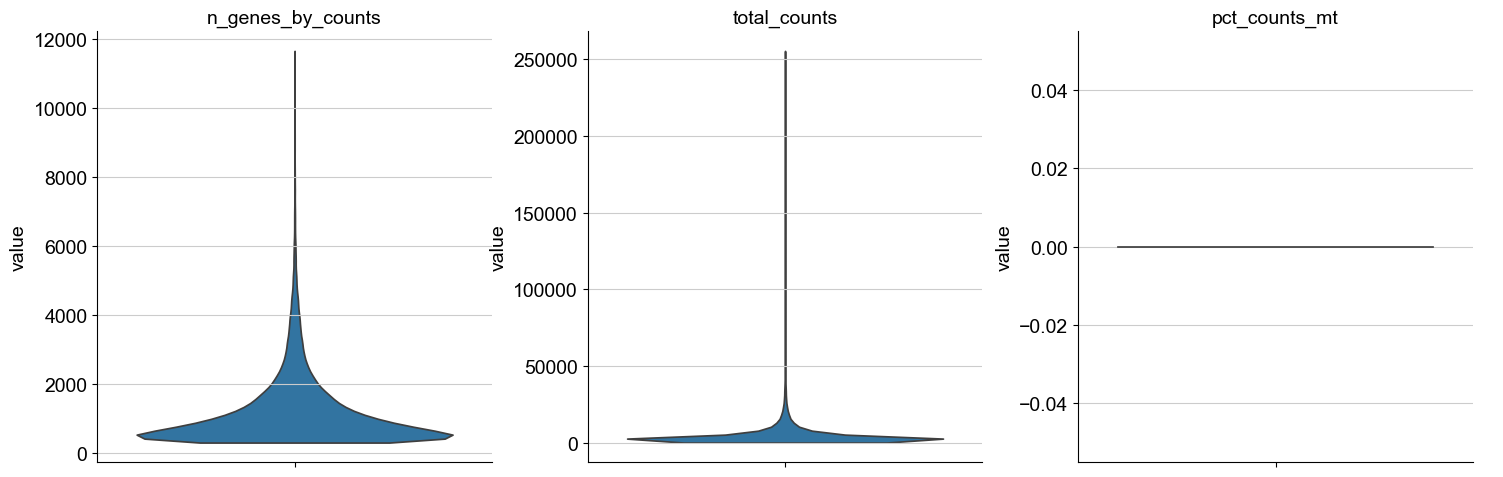

In [7]:
sc.pl.violin(adata, ['n_genes_by_counts', "total_counts", "pct_counts_mt"], jitter=0.4, multi_panel=True, size=0)

In [10]:
sc.pl.violin(adata, keys=['n_genes_by_counts'], groupby="Day",
             jitter=0.4, 
             multi_panel=True, 
             size=0)

KeyError: "Could not find keys '['Day']' in columns of `adata.obs` or in adata.var_names."

In [ ]:
adata.obs

In [ ]:
# Filter the data
adata = adata[adata.obs.n_genes_by_counts < 5000,:]
adata = adata[adata.obs.total_counts < 20000,:]
adata = adata[adata.obs.pct_counts_mt < 15,:]
adata.shape # Checking number of cells remaining

In [ ]:
sc.pl.scatter(adata, x = 'total_counts', y = 'n_genes_by_counts')